In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
np.random.seed(19680804)

In [17]:
df_time_all = pd.read_csv("df_time_all.csv")
df_time_all.head(2)

,stay_id,groupHPD,los_saki-sepsis,dataset
0,30003598,1,6.066667,mimic
1,30004144,2,6.000000,mimic


# plot: Bar chart

In [41]:
def annot_p(data_p):
    from statannotations.Annotator import Annotator
    box_pairs = [(1,2),(1,3),(2,3)]
    annotator =  Annotator(ax, data=data_p, x="groupHPD",y="los_saki-sepsis",pairs=box_pairs)
    annotator.configure(test='t-test_ind', text_format='star',line_height=0.03,line_width=1)
    annotator.apply_and_annotate()

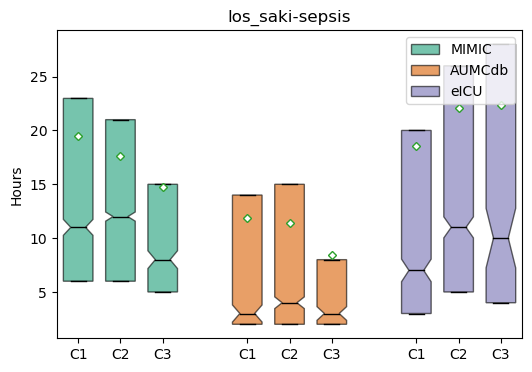

In [ ]:
fea_lst = [ 'los_saki-sepsis']#,'los_icu', 'los_outtime-saki']
for fea in fea_lst:
    df1 = df_time_all[df_time_all["dataset"]=="mimic"]
    df11 = df1[df1["groupHPD"]==1]
    df12 = df1[df1["groupHPD"]==2]
    df13 = df1[df1["groupHPD"]==3]
    df2 = df_time_all[df_time_all["dataset"]=="aumcdb"]
    df21 = df2[df2["groupHPD"]==1]
    df22 = df2[df2["groupHPD"]==2]
    df23 = df2[df2["groupHPD"]==3]
    df3 = df_time_all[df_time_all["dataset"]=="eicu"]
    df31 = df3[df3["groupHPD"]==1]
    df32 = df3[df3["groupHPD"]==2]
    df33 = df3[df3["groupHPD"]==3]
    
    fig = plt.figure(figsize=(6,4))
    medianprops = dict(linestyle='-', linewidth=1, color='black')
    meanprops = dict(color='b', markersize=4,marker="D",markerfacecolor="white")

    boxprops1 = dict(color='black',facecolor='#1b9e77',edgecolor="black", alpha=0.6)
    boxprops2 = dict(color='black',facecolor='#d95f02',edgecolor="black", alpha=0.6)
    boxprops3 = dict(color='black',facecolor='#7570b3',edgecolor="black", alpha=0.6)
    pa = plt.boxplot([df11[fea],df12[fea],df13[fea]],positions=[0,1,2], whis=(25,75),showfliers=False,showmeans=True, meanline=False,widths=0.7,boxprops=boxprops1,  patch_artist=True,meanprops=meanprops, medianprops=medianprops,notch=True)
    pb = plt.boxplot([df21[fea],df22[fea],df23[fea]],positions=[4,5,6],whis=(25,75),showfliers=False,showmeans=True, meanline=False,widths=0.7,boxprops=boxprops2,patch_artist=True,meanprops=meanprops, medianprops=medianprops,notch=True)
    pc = plt.boxplot([df31[fea],df32[fea],df33[fea]],positions=[8,9,10],whis=(25,75),showfliers=False,showmeans=True, meanline=False,widths=0.7,boxprops=boxprops3,patch_artist=True,meanprops=meanprops, medianprops=medianprops,notch=True)
    x_position= [0,1,2,4,5,6,8,9,10]
    x_position_fmt=["C1","C2","C3","C1","C2","C3","C1","C2","C3"]
    plt.xticks(x_position, x_position_fmt)
    plt.legend([pa["boxes"][0], pb["boxes"][0], pc["boxes"][0]], ['MIMIC', 'AUMCdb','eICU'], loc='upper right')
    plt.ylabel("Hours")
    plt.title(fea)
    
    plt.show()

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

1 vs. 2: t-test independent samples, P_val:5.212e-03 t=2.795e+00
2 vs. 3: t-test independent samples, P_val:7.323e-03 t=2.683e+00
1 vs. 3: t-test independent samples, P_val:6.035e-04 t=3.437e+00


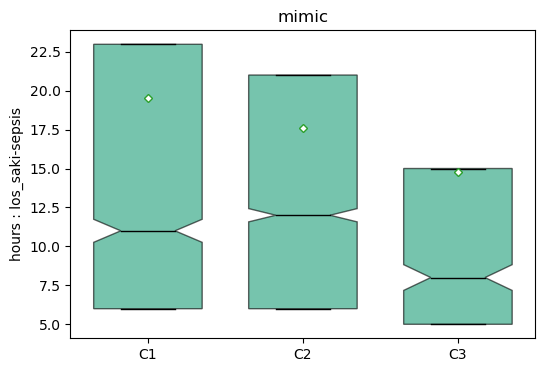

In [ ]:
fea_lst = [ 'los_saki-sepsis']#,'los_icu', 'los_outtime-saki']
select_dataset = "mimic"
for fea in fea_lst:
    df1 = df_time_all[df_time_all["dataset"]==select_dataset]
    df11 = df1[df1["groupHPD"]==1]
    df12 = df1[df1["groupHPD"]==2]
    df13 = df1[df1["groupHPD"]==3]
    
    fig = plt.figure(figsize=(6,4))
    medianprops = dict(linestyle='-', linewidth=1, color='black') 
    meanprops = dict(color='b', markersize=4,marker="D",markerfacecolor="white")
    boxprops1 = dict(color='black',facecolor='#1b9e77',edgecolor="black", alpha=0.6)
    pa = plt.boxplot([df11[fea],df12[fea],df13[fea]],positions=[0,1,2], whis=(25,75),showfliers=False,showmeans=True, meanline=False,widths=0.7,boxprops=boxprops1,  patch_artist=True,meanprops=meanprops, medianprops=medianprops,notch=True)
    x_position= [0,1,2]
    x_position_fmt=["C1","C2","C3"]
    plt.xticks(x_position, x_position_fmt)
    ylabels = 'hours : ' + fea
    plt.ylabel(ylabels)
    plt.title(select_dataset)
    
    from statannotations.Annotator import Annotator
    box_pairs = [(1,2),(1,3),(2,3)]
    annotator =  Annotator(ax, data=df1, x="groupHPD",y="los_saki-sepsis",pairs=box_pairs)
    annotator.configure(test='t-test_ind', text_format='star',line_height=0.03,line_width=1)
    annotator.apply_and_annotate()
    plt.show()

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

1 vs. 2: t-test independent samples, P_val:1.128e-02 t=-2.537e+00
2 vs. 3: t-test independent samples, P_val:9.149e-01 t=-1.069e-01
1 vs. 3: t-test independent samples, P_val:1.049e-01 t=-1.623e+00


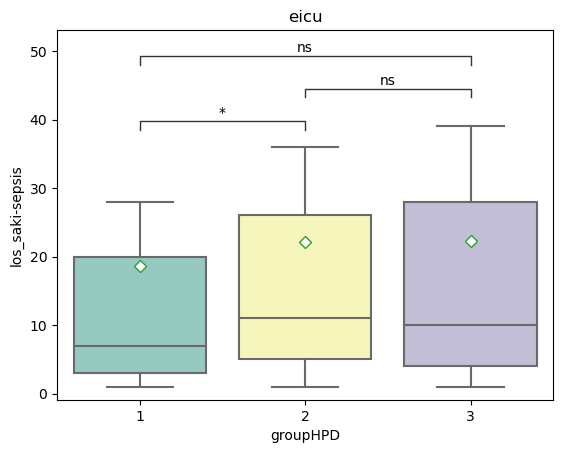

In [ ]:
import seaborn as sns

df_time = df3
tit = df_time.dataset.unique()[0]
df_time = df_time[["stay_id","los_saki-sepsis","groupHPD"]]
ax = sns.boxplot(x="groupHPD",y="los_saki-sepsis", data=df_time,palette="Set3", showfliers=False,showmeans=True,
            meanprops = {'marker':'D','markerfacecolor':'white'},whis=0.5)
data_p = df_time

from statannotations.Annotator import Annotator
box_pairs = [(1,2),(1,3),(2,3)]
annotator =  Annotator(ax, data=data_p, x="groupHPD",y="los_saki-sepsis",
                      pairs=box_pairs)
annotator.configure(test='t-test_ind', text_format='star',line_height=0.03,line_width=1)
annotator.apply_and_annotate()
plt.title(tit)
plt.show()

# plot: Pie chart

In [ ]:
def plot_sector(data, tit):
    N = len(data.values.reshape(-1))
    unit = 2 * np.pi / (2*N)
    start_lst = np.linspace(0.0, 2 * np.pi, 3, endpoint=False)
    theta_lst = []
    for i in start_lst:
        k = i
        for j in range(3):
            theta_lst.append(k)
            k = k+unit
    theta = theta_lst #np.linspace(0.0, 2 * np.pi, N, endpoint=False)

    radii = data.values.reshape(-1)
    width = np.pi / 4 * np.array([0.4]*N) 

    ax = plt.subplot(projection='polar')
    bars = ax.bar(theta, radii, width=width, bottom=0.0, align='edge', edgecolor=None, lw=0.8)

    colors = ["#ffcc00", "#ff9933", "#6666ff"]*3   
    for bar, color in zip(bars, colors):
        bar.set_color(color)
        bar.set_edgecolor("black")

    ax.tick_params(labelbottom=False, labeltop=False,
                           labelleft=True, labelright=False,labelsize=8)
    ax.grid(lw=0.2, color='0.9')
    plt.text(x_lst[0], y_lst[0],label_lst[0])
    plt.text(x_lst[1], y_lst[1],label_lst[1])
    plt.text(x_lst[2], y_lst[2],label_lst[2])
    
    colors = {"C1":"#ffcc00", "C2":"#ff9933", "C3":"#6666ff"} 
    labels = list(colors.keys())
    handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
    plt.legend(handles, labels,loc=2)
    plt.title(tit)
    plt.show()

In [5]:
df = df_time_all[df_time_all["dataset"]=="mimic"]
df =df.groupby(["groupHPD"]).agg({"los_icu":"mean", "los_saki-sepsis":"mean", "los_outtime-saki":"mean"}).reset_index().T
#df = df.groupby(["groupHPD"]).agg({"los_icu":"median", "los_saki-sepsis":"median", "los_outtime-saki":"median"}).reset_index().T
df.columns = df.iloc[0]
df = df.iloc[1: , :]
df_mimic_percent_all = df

In [6]:
df = df_time_all[df_time_all["dataset"]=="aumcdb"]
df =df.groupby(["groupHPD"]).agg({"los_icu":"mean", "los_saki-sepsis":"mean", "los_outtime-saki":"mean"}).reset_index().T
#df = df.groupby(["groupHPD"]).agg({"los_icu":"median", "los_saki-sepsis":"median", "los_outtime-saki":"median"}).reset_index().T
df.columns = df.iloc[0]
df = df.iloc[1: , :]
df_aumc_percent_all = df

In [7]:
df = df_time_all[df_time_all["dataset"]=="eicu"]
df =df.groupby(["groupHPD"]).agg({"los_icu":"mean", "los_saki-sepsis":"mean", "los_outtime-saki":"mean"}).reset_index().T
#df = df.groupby(["groupHPD"]).agg({"los_icu":"median", "los_saki-sepsis":"median", "los_outtime-saki":"median"}).reset_index().T
df.columns = df.iloc[0]
df = df.iloc[1: , :]
df_eicu_percent_all = df

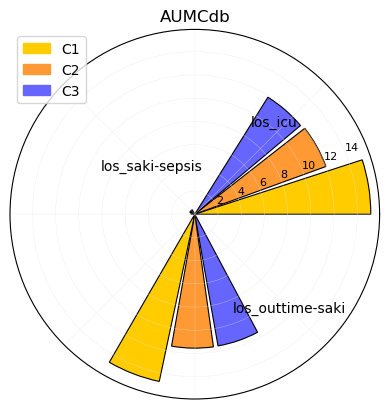

In [ ]:
x_lst = [1,2.7,-1.2]
y_lst = [9,9,9]
label_lst = ["los_icu", "los_saki-sepsis", "los_outtime-saki"]

df = df_aumc_percent_all
plot_sector(df, "AUMCdb") #

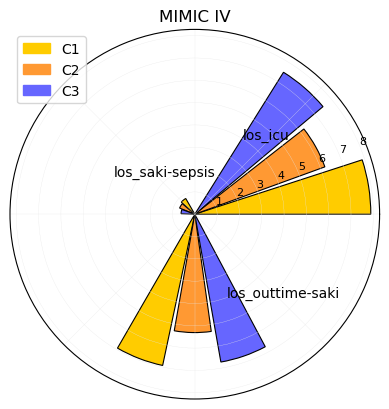

In [ ]:
x_lst = [1,2.7,-1.2]
y_lst = [4,4,4]
label_lst = ["los_icu", "los_saki-sepsis", "los_outtime-saki"]

df = df_mimic_percent_all
plot_sector(df, "MIMIC IV") 

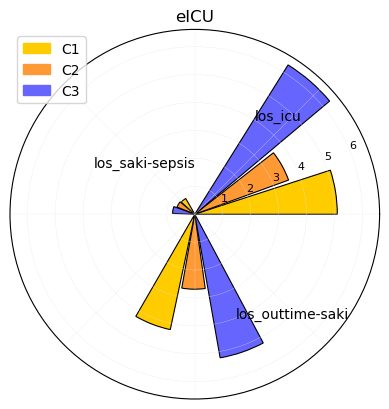

In [ ]:
x_lst = [1,2.7,-1.2]
y_lst = [4,4,4]
label_lst = ["los_icu", "los_saki-sepsis", "los_outtime-saki"]

df = df_eicu_percent_all
plot_sector(df, "eICU")